In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [3]:
T = 5
dt = 0.01
N = np.int(T/dt)

In [4]:
data_file = pd.read_table(r'C:\Users\111\Desktop\Image_processing\f15.txt', sep = ' ', header = None)
inputs = np.array(data_file.values)
inputs = inputs[0, :]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


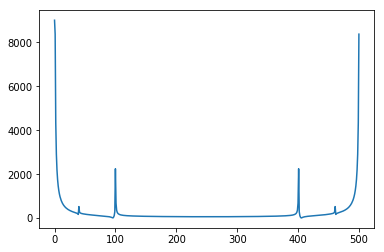

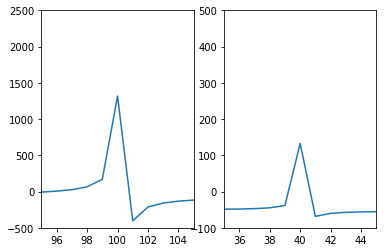

In [7]:
ft = np.fft.fft(inputs)
plt.figure(0)
plt.subplot(111)
plt.plot(np.abs(ft))

plt.figure(1)
plt.subplot(121)
plt.axis([95,105, -500, 2500])
plt.plot(ft)

plt.figure(1)
plt.subplot(122)
plt.axis([35,45, -100, 500])
plt.plot(ft)

In [8]:
f1, f2 = 100, 40
x = np.arange(0,T+dt,dt)
A = np.array([np.ones(N+1), x, x**2, x**3, np.sin(2*np.pi*f1*x/(N*dt)), np.sin(2*np.pi*f2*x/(N*dt))])

In [9]:
c = np.linalg.solve(np.dot(A, A.T), np.dot(A, inputs))
print(c)

[-10.00000625   2.0000101   -1.00000448   1.00000058   9.99999398
   3.00000461]


4.24656711207954e-25


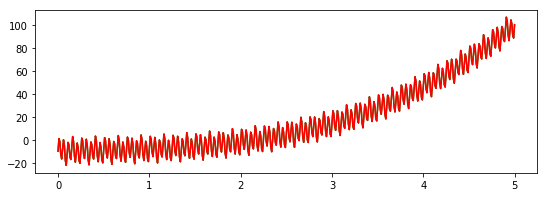

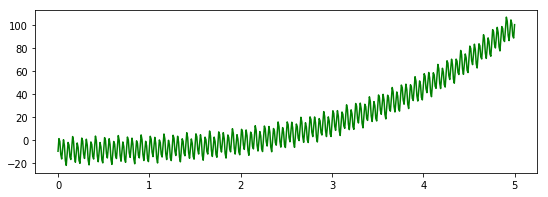

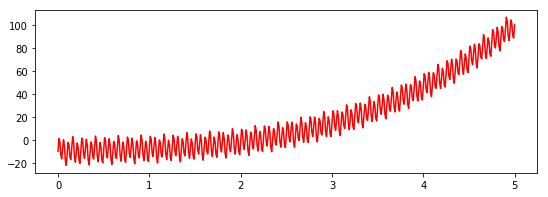

In [17]:
def F(x, c):
    return c[0] + c[1]*x + c[2]*(x**2) + c[3]*(x**3) + c[4]*np.sin(2*np.pi*f1*x/(N*dt)) + c[5]*np.sin(2*np.pi*f2*x/(N*dt))
plt.figure(1, figsize = (9,3))
plt.plot(x, inputs, color = 'g')
plt.plot(x, F(x, c), color = 'r')
plt.figure(2, figsize = (9,3))
plt.plot(x, inputs, color = 'g')
plt.figure(3, figsize = (9,3))
plt.plot(x, F(x, c), color = 'r')
print(np.sum((F(x,c)-inputs))**2)